<a href="https://colab.research.google.com/github/nilsutarhan/winxi/blob/main/winxclub_son.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Titanic dataset
train = pd.read_csv("/content/train-4.csv", header=None, error_bad_lines=False)

<ipython-input-19-d83b7de03acb>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train = pd.read_csv("/content/train-4.csv", header=None, error_bad_lines=False)


In [ ]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,69769,-946,0.1613,0.7960,Panl,N,Bus2,0.0742,0,2,...,1.0,-4670,0.9851,0.0,0,Mard,0.0,0.3333,0.0,0.0
1,236977,-92,NaN,NaN,NaN,Y,Othr,NaN,0,3,...,NaN,-1994,NaN,NaN,0,Mard,0.0,NaN,0.0,0.0
2,168821,-1646,0.1124,0.8504,Panl,N,Bus3,0.0387,0,2,...,2.0,-2842,0.9891,0.0,0,Sind,0.0,0.3750,0.0,1.0
3,94708,-1651,0.0263,NaN,Blok,N,Bus3,NaN,0,2,...,4.0,-1345,0.9682,0.0,0,Sind,0.0,0.0417,0.0,1.0
4,84556,-977,NaN,NaN,NaN,N,Rest,NaN,0,2,...,NaN,-852,NaN,NaN,0,Sind,0.0,NaN,0.0,0.0


In [ ]:
train.tail()

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
39649,67989,365243,NaN,NaN,Stok,N,XNAA,NaN,0,2,...,6.0,-4520,0.9851,NaN,0,Mard,2.0,0.1667,0.0,0.0
39650,122869,-598,0.1664,NaN,Panl,N,Secy,NaN,0,2,...,3.0,-3752,0.9821,0.0018,0,Mard,0.0,0.3333,0.0,0.0
39651,16638,-868,NaN,NaN,NaN,N,Bus2,NaN,0,2,...,0.0,-4473,NaN,NaN,0,Cive,0.0,NaN,0.0,0.0
39652,15914,-3965,NaN,NaN,Stok,Y,Othr,NaN,0,2,...,1.0,-4045,0.9970,0.0000,0,Mard,0.0,0.1667,0.0,0.0
39653,67651,-482,0.2691,0.8028,Stok,N,Bus3,0.0297,0,2,...,5.0,-1007,0.9856,0.3948,0,Mard,NaN,NaN,NaN,NaN


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39654 entries, 0 to 39653
Columns: 122 entries, 0 to 121
dtypes: float64(67), int64(39), object(16)
memory usage: 36.9+ MB


In [ ]:
train.describe()

,0,1,2,3,7,8,9,10,11,12,...,111,112,113,114,115,116,118,119,120,121
count,39654.000000,39654.000000,16576.000000,13351.000000,12081.000000,39654.000000,39654.000000,19819.000000,16193.000000,34261.000000,...,12630.000000,34261.000000,39654.000000,20401.000000,17883.000000,39654.000000,39532.000000,20052.000000,39653.000000,39653.00000
mean,153923.940460,63110.765421,0.087971,0.751125,0.042086,0.003404,2.032254,0.106735,0.065715,0.266192,...,0.101294,1.911766,-2995.281510,0.976716,0.027181,0.000025,0.144946,0.225160,0.081003,0.08017
std,88598.000869,140693.106990,0.081899,0.112411,0.073399,0.058249,0.503380,0.111124,0.080833,0.904428,...,0.094571,1.876828,1504.814083,0.066925,0.072612,0.005022,0.440467,0.144979,0.272843,0.27156
min,1.000000,-17522.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-6265.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,77558.250000,-2758.750000,0.043300,0.687200,0.007100,0.000000,2.000000,0.044800,0.018300,0.000000,...,0.051300,0.000000,-4301.000000,0.976200,0.000000,0.000000,0.000000,0.166700,0.000000,0.00000
50%,154047.000000,-1230.000000,0.075800,0.755200,0.018400,0.000000,2.000000,0.074000,0.047600,0.000000,...,0.076100,1.000000,-3252.000000,0.981600,0.001100,0.000000,0.000000,0.166700,0.000000,0.00000
75%,230989.500000,-295.000000,0.112200,0.823200,0.048200,0.000000,2.000000,0.129000,0.085100,0.000000,...,0.123100,3.000000,-1728.000000,0.986600,0.023100,0.000000,0.000000,0.333300,0.000000,0.00000
max,307504.000000,365243.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,17.000000,...,1.000000,19.000000,0.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.00000


In [ ]:
train.shape

(39654, 122)

In [ ]:
print(train.dtypes)

0        int64
1        int64
2      float64
3      float64
4       object
        ...   
117     object
118    float64
119    float64
120    float64
121    float64
Length: 122, dtype: object


In [ ]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,69769,-946,0.1613,0.7960,Panl,N,Bus2,0.0742,0,2,...,1.0,-4670,0.9851,0.0,0,Mard,0.0,0.3333,0.0,0.0
1,236977,-92,NaN,NaN,NaN,Y,Othr,NaN,0,3,...,NaN,-1994,NaN,NaN,0,Mard,0.0,NaN,0.0,0.0
2,168821,-1646,0.1124,0.8504,Panl,N,Bus3,0.0387,0,2,...,2.0,-2842,0.9891,0.0,0,Sind,0.0,0.3750,0.0,1.0
3,94708,-1651,0.0263,NaN,Blok,N,Bus3,NaN,0,2,...,4.0,-1345,0.9682,0.0,0,Sind,0.0,0.0417,0.0,1.0
4,84556,-977,NaN,NaN,NaN,N,Rest,NaN,0,2,...,NaN,-852,NaN,NaN,0,Sind,0.0,NaN,0.0,0.0


In [ ]:
train.shape

(39654, 122)

In [ ]:
train.columns = [ 'column' + str(i + 1) for i in range(len(train.columns)) ] 

In [ ]:
train.head()

,column1,column2,column3,column4,column5,column6,column7,column8,column9,column10,...,column113,column114,column115,column116,column117,column118,column119,column120,column121,column122
0,69769,-946,0.1613,0.7960,Panl,N,Bus2,0.0742,0,2,...,1.0,-4670,0.9851,0.0,0,Mard,0.0,0.3333,0.0,0.0
1,236977,-92,NaN,NaN,NaN,Y,Othr,NaN,0,3,...,NaN,-1994,NaN,NaN,0,Mard,0.0,NaN,0.0,0.0
2,168821,-1646,0.1124,0.8504,Panl,N,Bus3,0.0387,0,2,...,2.0,-2842,0.9891,0.0,0,Sind,0.0,0.3750,0.0,1.0
3,94708,-1651,0.0263,NaN,Blok,N,Bus3,NaN,0,2,...,4.0,-1345,0.9682,0.0,0,Sind,0.0,0.0417,0.0,1.0
4,84556,-977,NaN,NaN,NaN,N,Rest,NaN,0,2,...,NaN,-852,NaN,NaN,0,Sind,0.0,NaN,0.0,0.0


In [ ]:
# Fill in missing values with average values
train = train.fillna(train.mean())
# Remove missing values
train = train.dropna()

<ipython-input-30-e3eb4162295c>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.fillna(train.mean())


In [ ]:
train.shape

(8600, 122)

In [ ]:
non_floats = []
for col in train:
    if train[col].dtypes != "float64":
        non_floats.append(col)
train_2 = train.drop(columns=non_floats)

In [ ]:
train_2.shape

(8600, 67)

In [ ]:
train_2.head()

,column3,column4,column8,column11,column12,column13,column14,column18,column19,column22,...,column103,column110,column112,column113,column115,column116,column119,column120,column121,column122
0,0.161300,0.7960,0.074200,0.2281,0.065000,0.000000,180000.0,0.074000,0.000000,0.2227,...,12.108124,0.9851,0.184700,1.000000,0.9851,0.000000,0.0,0.3333,0.0,0.0
2,0.112400,0.8504,0.038700,0.1614,0.306400,0.000000,553500.0,0.038600,0.000000,0.1485,...,12.108124,0.9891,0.123100,2.000000,0.9891,0.000000,0.0,0.3750,0.0,1.0
13,0.087971,0.6532,0.042086,0.0252,0.065715,0.000000,787500.0,0.044118,0.009398,0.0361,...,12.108124,0.9747,0.101294,0.000000,0.9747,0.027181,0.0,0.1250,0.0,0.0
15,0.046500,0.7892,0.030600,0.0918,0.065715,0.266192,630000.0,0.030500,0.000000,0.1010,...,6.000000,0.9846,0.083800,1.911766,0.9846,0.000000,0.0,0.5417,0.0,0.0
20,0.076200,0.6804,0.007300,0.0523,0.016300,0.266192,180000.0,0.007200,0.019300,0.0660,...,12.108124,0.9767,0.050400,1.911766,0.9767,0.050600,0.0,0.1667,0.0,0.0


In [ ]:
# Finding the number of columns containing NaN values
null_columns = train.columns[train.isnull().any()]
null_count = train[null_columns].isnull().sum()

print(null_count)

Series([], dtype: float64)


In [ ]:
if train.isnull().any().any():
    print("There are still NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")

There are no NaN values in the DataFrame.


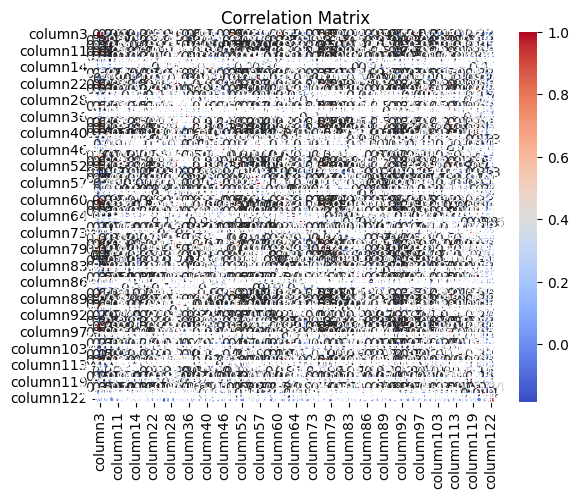

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = train_2.corr()

# Visualize the correlation matrix with a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# According to the correlation plot, 
#the correlation between columns 62 and 120 is closest to 1, so we looked at the histogram values between columns 62 and 120.

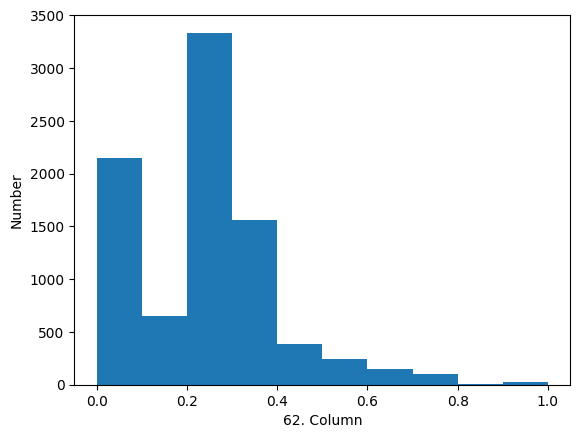

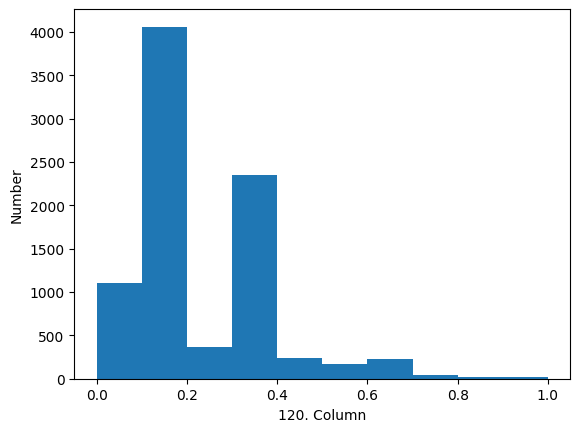

In [ ]:

# Plot the 1st column as a histogram
plt.hist(train['column62'], bins=10)

# Set axis labels
plt.xlabel('62. Column')
plt.ylabel('Number')

# Show chart
plt.show()
# plot the 2nd column as a histogram
plt.hist(train['column120'], bins=10)

# Set axis labels
plt.xlabel('120. Column')
plt.ylabel('Number')

# Show chart
plt.show()

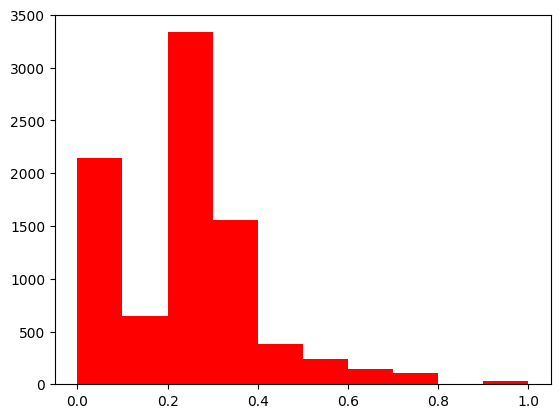

In [ ]:
# Plot a histogram of the 'Age' column
plt.hist(train['column62'], color=['red'])
plt.show()

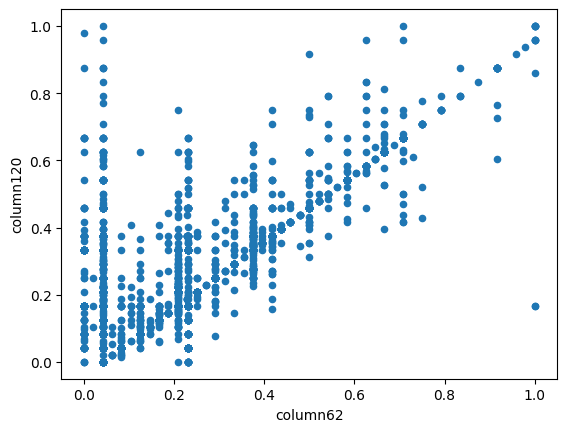

In [ ]:
train.plot.scatter(x='column62', y='column120')
plt.show()

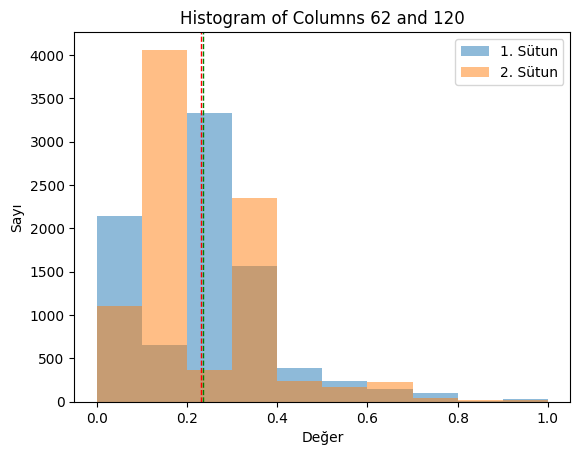

In [ ]:
# Show the histograms of the 1st and 2nd columns in the same graph
plt.hist(train['column62'], bins=10, alpha=0.5, label='1. Sütun')
plt.hist(train['column120'], bins=10, alpha=0.5, label='2. Sütun')

# Set axis labels and title
plt.xlabel('Değer')
plt.ylabel('Sayı')
plt.title('Histogram of Columns 62 and 120')

# Add horizontal line (average)
plt.axvline(train['column62'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(train['column120'].mean(), color='green', linestyle='dashed', linewidth=1)

# Show visualization
plt.legend()
plt.show()